In [1]:
from google.colab import drive
drive.mount("/drive")

Mounted at /drive


In [2]:
import pandas as pd

In [3]:
dados = pd.read_csv("../data/processed/pre-processados.csv")

dados = dados.drop(columns=["Ultimo IGC Categoria","Variacao IGC","Saldo 2017 Positivo"])

dados['Fim Lucrativo'] = dados['Fim Lucrativo'].map({'Lucrativo': 1, 'Não Lucrativo': 0})

dados['Situacao'] = dados['Situacao'].map({'Ativa': 1, 'Extinta': 0})

dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1420 entries, 0 to 1419
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Codigo da IES             1420 non-null   int64  
 1   Fim Lucrativo             1420 non-null   int64  
 2   Situacao                  1420 non-null   int64  
 3   DIAS                      1420 non-null   int64  
 4   Cursos Sem Ato 5 anos     1420 non-null   float64
 5   Ultimo CI                 1420 non-null   float64
 6   Ultimo IGC                1420 non-null   float64
 7   EAD_17                    1420 non-null   int64  
 8   Variacao Matricula 16/17  1420 non-null   float64
 9   Matriculas 17             1420 non-null   int64  
 10  % FIES                    1420 non-null   float64
 11  CURSOS                    1420 non-null   int64  
 12  Saldo 2017                1420 non-null   float64
 13  Variacao do Saldo 16/17   1420 non-null   float64
dtypes: float

In [18]:
dados['Situacao'].value_counts()

1    1335
0      85
Name: Situacao, dtype: int64

In [4]:
dados.describe()

,Codigo da IES,Fim Lucrativo,Situacao,DIAS,Cursos Sem Ato 5 anos,Ultimo CI,Ultimo IGC,EAD_17,Variacao Matricula 16/17,Matriculas 17,% FIES,CURSOS,Saldo 2017,Variacao do Saldo 16/17
count,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1.420000e+03,1.420000e+03
mean,3376.033803,0.538028,0.940141,3297.327465,0.535502,3.439437,2.355782,0.895070,0.397030,2851.571831,0.167398,14.465493,8.671805e+07,3.918976e+05
std,3759.329206,0.498727,0.237309,3378.370813,0.205310,0.679817,0.745195,0.306571,8.710823,14038.144012,0.183268,65.562989,4.925563e+08,1.476896e+07
min,10.000000,0.000000,0.000000,20.000000,0.000000,1.000000,0.000000,0.000000,-0.957576,0.000000,0.000000,-1.000000,-1.462725e+10,-1.188739e+05
25%,1309.500000,0.000000,1.000000,885.000000,0.394537,3.000000,2.059050,1.000000,-0.069837,170.750000,0.000000,2.000000,2.516275e+04,-4.618658e-01
50%,2140.500000,1.000000,1.000000,2421.000000,0.562996,3.000000,2.448250,1.000000,0.000000,650.500000,0.105265,6.000000,1.770333e+06,0.000000e+00
75%,3803.250000,1.000000,1.000000,5331.000000,0.689860,4.000000,2.780300,1.000000,0.106073,1991.250000,0.285892,12.000000,1.794127e+07,4.728928e-01
max,19512.000000,1.000000,1.000000,27781.000000,1.000000,5.000000,4.883800,1.000000,316.500000,380605.000000,0.844193,1428.000000,3.996830e+09,5.565371e+08


Accuracy: 0.9190140845070423

Confusion Matrix:
 [[  6  13]
 [ 10 255]]

Classification Report:
               precision    recall  f1-score   support

           0       0.38      0.32      0.34        19
           1       0.95      0.96      0.96       265

    accuracy                           0.92       284
   macro avg       0.66      0.64      0.65       284
weighted avg       0.91      0.92      0.92       284



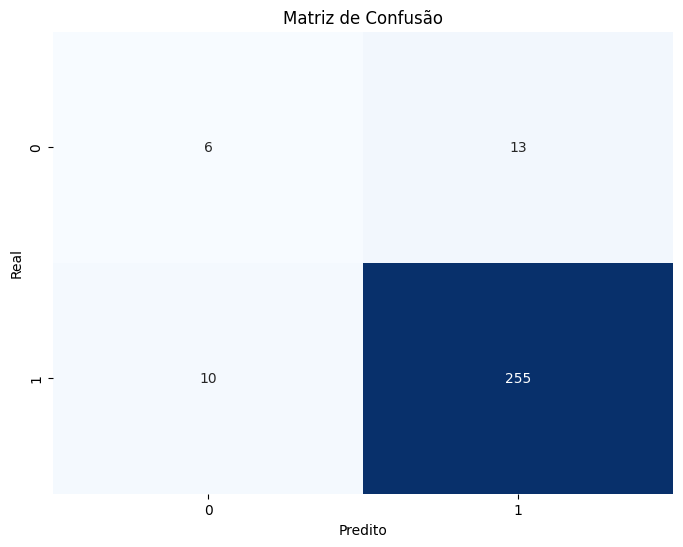

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

colunas_para_normalizacao = ['Fim Lucrativo', 'DIAS', 'Cursos Sem Ato 5 anos', 'Ultimo CI',
                              'Ultimo IGC', 'EAD_17', 'Variacao Matricula 16/17', 'Matriculas 17',
                              '% FIES', 'CURSOS', 'Saldo 2017', 'Variacao do Saldo 16/17']

X = dados[colunas_para_normalizacao]
Y = dados['Situacao']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

knn_model = KNeighborsClassifier(n_neighbors=3)

knn_model.fit(X_train, y_train)

y_pred = knn_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_rep)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Matriz de Confusão")
plt.xlabel("Predito")
plt.ylabel("Real")
plt.show()

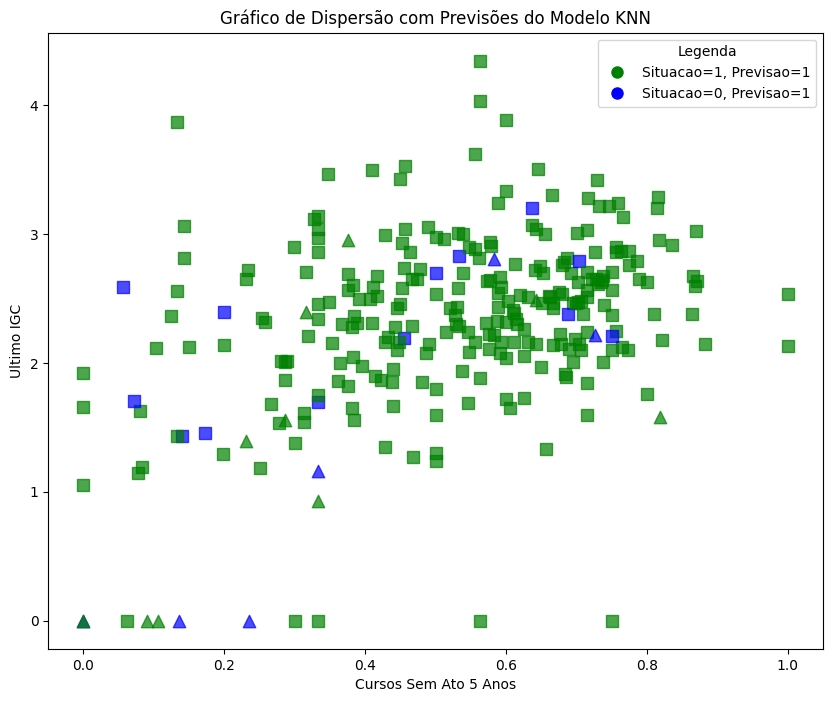

In [57]:
X_test['Prediction'] = y_pred
X_test['Situacao'] = y_test

# Mapear as classes para cores e marcadores
class_marker_mapping = {1: 's', 0: '^'}
class_color_mapping = {1: 'green', 0: 'blue'}

# Criar um gráfico de dispersão
plt.figure(figsize=(10, 8))
for index, row in X_test.iterrows():
    marker = class_marker_mapping.get(row['Prediction'], 'o')
    color = class_color_mapping.get(row['Situacao'], 'black')
    plt.scatter(row['Cursos Sem Ato 5 anos'], row['Ultimo IGC'], marker=marker, color=color, s=80, alpha=0.7)

# Adicionar rótulos e legenda
plt.xlabel('Cursos Sem Ato 5 Anos')
plt.ylabel('Ultimo IGC')
plt.title('Gráfico de Dispersão com Previsões do Modelo KNN')

# Criar legendas
legend_labels = {'Situacao=1, Previsao=1': 'green',
                 'Situacao=0, Previsao=1': 'blue'}
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label=label, markerfacecolor=color, markersize=10)
                    for label, color in legend_labels.items()]

# Adicionar a legenda
plt.legend(handles=legend_elements, title='Legenda', loc='upper right')

# Exibir o gráfico
plt.show()

Accuracy: 0.9225352112676056

Confusion Matrix:
 [[  7  12]
 [ 10 255]]

Classification Report:
               precision    recall  f1-score   support

           0       0.41      0.37      0.39        19
           1       0.96      0.96      0.96       265

    accuracy                           0.92       284
   macro avg       0.68      0.67      0.67       284
weighted avg       0.92      0.92      0.92       284



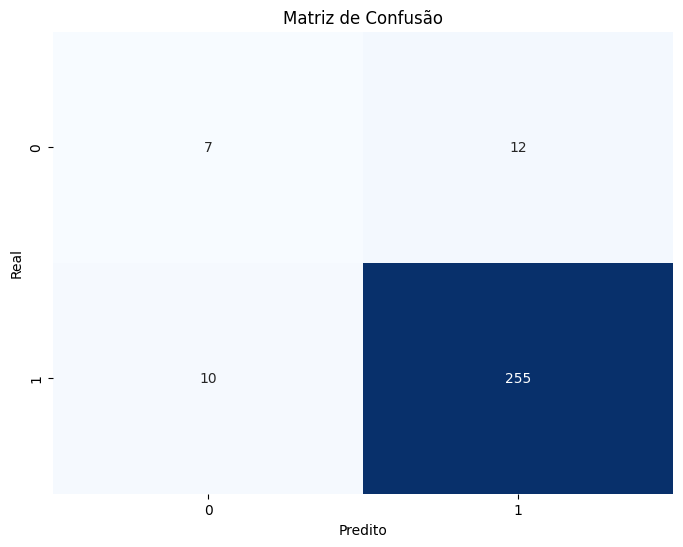

In [51]:
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

decision_tree_model = DecisionTreeClassifier(max_depth=5, min_samples_split=5, min_samples_leaf=5,random_state=42)

decision_tree_model.fit(X_train, y_train)

y_pred = decision_tree_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_rep)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Matriz de Confusão")
plt.xlabel("Predito")
plt.ylabel("Real")
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Suponha que você tenha um DataFrame chamado 'dados' com as colunas fornecidas
# dados = ...

# Criar gráficos de dispersão para todas as combinações de pares de colunas
sns.set(style="ticks")
sns.pairplot(dados_normal,hue="Cluster")
plt.show()

In [17]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

logistic_model = LogisticRegression(random_state=42)
tree_model = DecisionTreeClassifier(random_state=42)
svm_model = SVC(probability=True, random_state=42)

voting_clf = VotingClassifier(estimators=[('logistic', logistic_model), ('tree', tree_model), ('svm', svm_model)], voting='soft')

voting_clf.fit(X_train, y_train)

y_pred = voting_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Acurácia do Voting Classifier:", accuracy)

confusion = confusion_matrix(y_test, y_pred)
print("Matriz de Confusão:\n", confusion)

report = classification_report(y_test, y_pred)
print("Relatório de Classificação:\n", report)

fpr, tpr, thresholds = roc_curve(y_test, voting_clf.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)
print("Área Sob a Curva (AUC):", roc_auc)

Acurácia do Voting Classifier: 0.9330985915492958
Matriz de Confusão:
 [[  0  19]
 [  0 265]]
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        19
           1       0.93      1.00      0.97       265

    accuracy                           0.93       284
   macro avg       0.47      0.50      0.48       284
weighted avg       0.87      0.93      0.90       284

Área Sob a Curva (AUC): 0.7380337636544191


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [29]:
pip install graphviz

In [46]:
from sklearn.tree import export_graphviz
import graphviz

# Exporte a árvore de decisão para um arquivo .dot
dot_data = export_graphviz(decision_tree_model, out_file=None,
                           feature_names=X.columns,
                           class_names=dados["Situacao"].unique().astype(str),
                           filled=True, rounded=True, special_characters=True)

# Crie um objeto Graphviz a partir do arquivo .dot
graph = graphviz.Source(dot_data)

# Exiba a árvore de decisão
graph.render("iris_tree")
graph.view("iris_tree")

'iris_tree.pdf'

In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Inicializar o modelo de Floresta Aleatória
rf_model = RandomForestClassifier(random_state=42)

# Treinar o modelo
rf_model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = rf_model.predict(X_test)

# Calcular métricas de desempenho
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Imprimir as métricas
print(f"Acurácia: {accuracy:.4f}")
print(f"Precisão: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print("Matriz de Confusão:\n", conf_matrix)
print("Relatório de Classificação:\n", class_report)

Acurácia: 0.9331
Precisão: 0.9220
Recall: 0.9331
F1-Score: 0.9260
Matriz de Confusão:
 [[  6  13]
 [  6 259]]
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.50      0.32      0.39        19
           1       0.95      0.98      0.96       265

    accuracy                           0.93       284
   macro avg       0.73      0.65      0.68       284
weighted avg       0.92      0.93      0.93       284



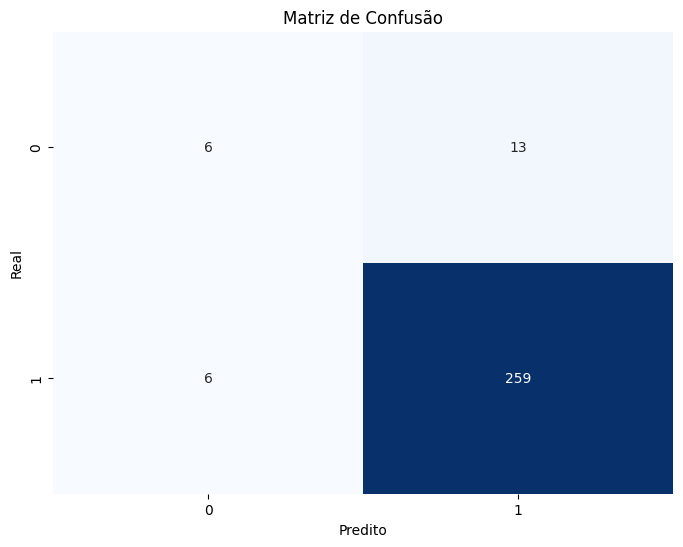

In [53]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Matriz de Confusão")
plt.xlabel("Predito")
plt.ylabel("Real")
plt.show()